In [8]:
# Initial imports
import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from alpaca_trade_api.rest import REST, TimeFrame
import pandas as pd
from pandas import DataFrame, Series

import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

#pip install alpaca-py
from alpaca.data.timeframe import TimeFrame
from alpaca.data.requests import StockBarsRequest
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.historical import CryptoHistoricalDataClient
# Load .env environment variables
load_dotenv()

True

In [9]:
#Import data to establish a baseline performance
import alpaca_trade_api as tradeapi

API_KEY = os.getenv("ALPACA_API_KEY")
API_SECRET = os.getenv("ALPACA_SECRET_KEY")
ALPACA_API_BASE_URL = "https://paper-api.alpaca.markets"
ALPACA_PAPER = True
load_dotenv()

True

In [10]:
 # Create a connection to the API 
api = REST(key_id=API_KEY,secret_key=API_SECRET,base_url="https://paper-api.alpaca.markets")


eth_df = api.get_crypto_bars('ETHUSD', TimeFrame.Hour, "2021-10-01", "2022-10-01").df
eth_df = eth_df[eth_df.exchange == 'CBSE']

eth_df.head()


,exchange,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,,
2021-10-01 05:00:00+00:00,CBSE,3000.08,3020.89,2993.38,3018.04,3036.432805,7803,3009.790394
2021-10-01 06:00:00+00:00,CBSE,3018.13,3029.96,3005.73,3026.53,3071.178639,6953,3020.434557
2021-10-01 07:00:00+00:00,CBSE,3026.91,3097.87,3015.07,3092.79,9649.231498,14164,3068.836478
2021-10-01 08:00:00+00:00,CBSE,3092.66,3124.00,3092.66,3121.00,5960.572407,10832,3107.473627
2021-10-01 09:00:00+00:00,CBSE,3121.25,3136.00,3108.93,3115.66,3969.349360,9333,3120.409664


/Users/thehalpins/opt/anaconda3/lib/python3.9/site-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


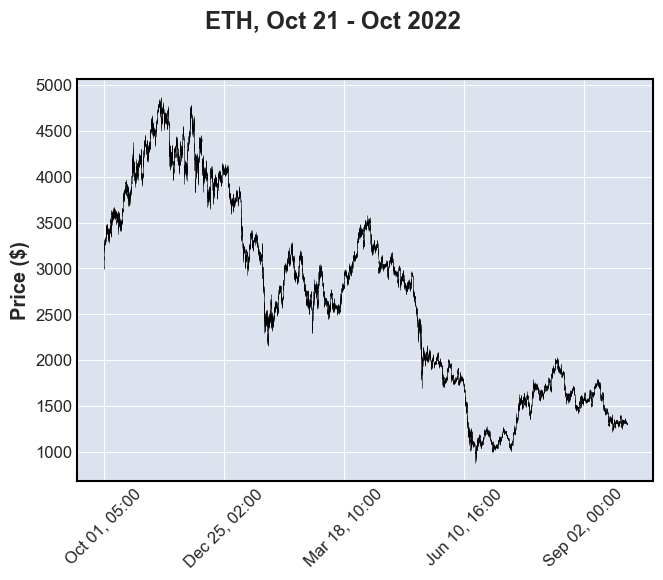

In [11]:
import mplfinance as fplt

fplt.plot(
            eth_df,
            type='candle',
            title='ETH, Oct 21 - Oct 2022',
            ylabel='Price ($)'
        )

In [12]:
# Filter the date index and close columns
eth_signals_df = eth_df.loc[:, ["close"]]

# Use the pct_change function to generate  returns from close prices
eth_signals_df["Actual Returns"] = eth_df["close"].pct_change()

# Drop all NaN values from the DataFrame
eth_signals_df = eth_signals_df.dropna()

# Review the DataFrame
display(eth_signals_df.head())
display(eth_signals_df.tail())

,close,Actual Returns
timestamp,,
2021-10-01 06:00:00+00:00,3026.53,0.002813
2021-10-01 07:00:00+00:00,3092.79,0.021893
2021-10-01 08:00:00+00:00,3121.00,0.009121
2021-10-01 09:00:00+00:00,3115.66,-0.001711
2021-10-01 10:00:00+00:00,3206.36,0.029111


,close,Actual Returns
timestamp,,
2022-10-02 00:00:00+00:00,1310.39,-0.001044
2022-10-02 01:00:00+00:00,1307.98,-0.001839
2022-10-02 02:00:00+00:00,1310.60,0.002003
2022-10-02 03:00:00+00:00,1309.62,-0.000748
2022-10-02 04:00:00+00:00,1312.79,0.002421


In [13]:
# Step 2: Generate trading signals using short- and long-window and SMA_200 SMA values

# Set the short window and long window
short_window = 10
long_window = 100
sma_200 = 200

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
eth_signals_df['SMA_Fast'] = eth_signals_df['close'].rolling(window=short_window).mean()
eth_signals_df['SMA_Slow'] = eth_signals_df['close'].rolling(window=long_window).mean()
eth_signals_df['SMA_200'] = eth_signals_df['close'].rolling(window=sma_200).mean()

eth_signals_df = eth_signals_df.dropna()

# Review the DataFrame
display(eth_signals_df.head())
display(eth_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,SMA_200
timestamp,,,,,
2021-10-09 13:00:00+00:00,3622.92,0.005347,3599.838,3555.5728,3452.95995
2021-10-09 14:00:00+00:00,3616.82,-0.001684,3602.722,3557.3503,3455.91140
2021-10-09 15:00:00+00:00,3601.36,-0.004274,3604.274,3558.8912,3458.45425
2021-10-09 16:00:00+00:00,3588.36,-0.003610,3602.871,3560.2256,3460.79105
2021-10-09 17:00:00+00:00,3594.82,0.001800,3601.656,3561.5813,3463.18685


,close,Actual Returns,SMA_Fast,SMA_Slow,SMA_200
timestamp,,,,,
2022-10-02 00:00:00+00:00,1310.39,-0.001044,1313.135,1325.2155,1326.58270
2022-10-02 01:00:00+00:00,1307.98,-0.001839,1311.658,1325.0773,1326.64445
2022-10-02 02:00:00+00:00,1310.60,0.002003,1311.631,1324.8818,1326.78390
2022-10-02 03:00:00+00:00,1309.62,-0.000748,1311.298,1324.6988,1326.87020
2022-10-02 04:00:00+00:00,1312.79,0.002421,1311.044,1324.4916,1326.93145


In [44]:
eth_signals_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

In [16]:
# Initialize the new Signal column
eth_signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
eth_signals_df.loc[(eth_signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
eth_signals_df.loc[(eth_signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(eth_signals_df.head())
display(eth_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,SMA_200,Signal
timestamp,,,,,,
2021-10-09 13:00:00+00:00,3622.92,0.005347,3599.838,3555.5728,3452.95995,1.0
2021-10-09 14:00:00+00:00,3616.82,-0.001684,3602.722,3557.3503,3455.91140,-1.0
2021-10-09 15:00:00+00:00,3601.36,-0.004274,3604.274,3558.8912,3458.45425,-1.0
2021-10-09 16:00:00+00:00,3588.36,-0.003610,3602.871,3560.2256,3460.79105,-1.0
2021-10-09 17:00:00+00:00,3594.82,0.001800,3601.656,3561.5813,3463.18685,1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,SMA_200,Signal
timestamp,,,,,,
2022-10-02 00:00:00+00:00,1310.39,-0.001044,1313.135,1325.2155,1326.58270,-1.0
2022-10-02 01:00:00+00:00,1307.98,-0.001839,1311.658,1325.0773,1326.64445,-1.0
2022-10-02 02:00:00+00:00,1310.60,0.002003,1311.631,1324.8818,1326.78390,1.0
2022-10-02 03:00:00+00:00,1309.62,-0.000748,1311.298,1324.6988,1326.87020,-1.0
2022-10-02 04:00:00+00:00,1312.79,0.002421,1311.044,1324.4916,1326.93145,1.0


In [17]:
eth_signals_df['Signal'].value_counts()

-1.0    4292
 1.0    4233
Name: Signal, dtype: int64

In [18]:
# Calculate the strategy returns and add them to the signals_df DataFrame
eth_signals_df['Strategy Returns'] = eth_signals_df['Actual Returns'] * eth_signals_df['Signal'].shift()
eth_signals_df.drop_duplicates()
# Review the DataFrame
display(eth_signals_df.head())
display(eth_signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,SMA_200,Signal,Strategy Returns
timestamp,,,,,,,
2021-10-09 13:00:00+00:00,3622.92,0.005347,3599.838,3555.5728,3452.95995,1.0,NaN
2021-10-09 14:00:00+00:00,3616.82,-0.001684,3602.722,3557.3503,3455.91140,-1.0,-0.001684
2021-10-09 15:00:00+00:00,3601.36,-0.004274,3604.274,3558.8912,3458.45425,-1.0,0.004274
2021-10-09 16:00:00+00:00,3588.36,-0.003610,3602.871,3560.2256,3460.79105,-1.0,0.003610
2021-10-09 17:00:00+00:00,3594.82,0.001800,3601.656,3561.5813,3463.18685,1.0,-0.001800


,close,Actual Returns,SMA_Fast,SMA_Slow,SMA_200,Signal,Strategy Returns
timestamp,,,,,,,
2022-10-02 00:00:00+00:00,1310.39,-0.001044,1313.135,1325.2155,1326.58270,-1.0,0.001044
2022-10-02 01:00:00+00:00,1307.98,-0.001839,1311.658,1325.0773,1326.64445,-1.0,0.001839
2022-10-02 02:00:00+00:00,1310.60,0.002003,1311.631,1324.8818,1326.78390,1.0,-0.002003
2022-10-02 03:00:00+00:00,1309.62,-0.000748,1311.298,1324.6988,1326.87020,-1.0,-0.000748
2022-10-02 04:00:00+00:00,1312.79,0.002421,1311.044,1324.4916,1326.93145,1.0,-0.002421


<AxesSubplot:xlabel='timestamp'>

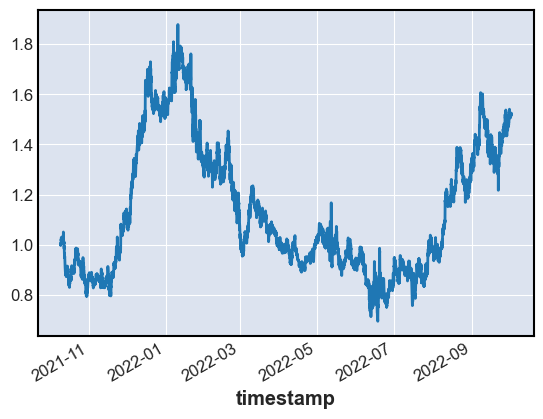

In [19]:
# Plot Strategy Returns to examine performance
(1 + eth_signals_df['Strategy Returns']).cumprod().plot()

In [ ]:
import mplfinance as fplt

In [20]:
#Split the data into training and testing datasets.
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = eth_signals_df[['SMA_Fast', 'SMA_Slow','SMA_200']].shift().dropna()
X.drop_duplicates()
# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow,SMA_200
timestamp,,,
2021-10-09 14:00:00+00:00,3599.838,3555.5728,3452.95995
2021-10-09 15:00:00+00:00,3602.722,3557.3503,3455.91140
2021-10-09 16:00:00+00:00,3604.274,3558.8912,3458.45425
2021-10-09 17:00:00+00:00,3602.871,3560.2256,3460.79105
2021-10-09 18:00:00+00:00,3601.656,3561.5813,3463.18685


In [21]:
# Create the target set selecting the Signal column and assiging it to y
y = eth_signals_df['Signal']

# Review the value counts
y.value_counts()

-1.0    4292
 1.0    4233
Name: Signal, dtype: int64

In [22]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2021-10-09 14:00:00+00:00


In [23]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2022-01-09 14:00:00+00:00


In [24]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow,SMA_200
timestamp,,,
2021-10-09 14:00:00+00:00,3599.838,3555.5728,3452.95995
2021-10-09 15:00:00+00:00,3602.722,3557.3503,3455.91140
2021-10-09 16:00:00+00:00,3604.274,3558.8912,3458.45425
2021-10-09 17:00:00+00:00,3602.871,3560.2256,3460.79105
2021-10-09 18:00:00+00:00,3601.656,3561.5813,3463.18685


In [25]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(hours=1):]
y_test = y.loc[training_end+DateOffset(hours=1):]

# Review the X_test DataFrame
X_test.head()

,SMA_Fast,SMA_Slow,SMA_200
timestamp,,,
2021-10-09 14:00:00+00:00,3599.838,3555.5728,3452.95995
2021-10-09 15:00:00+00:00,3602.722,3557.3503,3455.91140
2021-10-09 16:00:00+00:00,3604.274,3558.8912,3458.45425
2021-10-09 17:00:00+00:00,3602.871,3560.2256,3460.79105
2021-10-09 18:00:00+00:00,3601.656,3561.5813,3463.18685


In [26]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [27]:
X.shape
#y.shape
y.shape


(8525,)

In [29]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)
 
# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
svm_pred

array([-1., -1., -1., ..., -1., -1., -1.])

In [30]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred)

# Print the classification report
print(svm_testing_report)


              precision    recall  f1-score   support

        -1.0       0.50      0.97      0.66      3197
         1.0       0.50      0.03      0.06      3155

    accuracy                           0.50      6352
   macro avg       0.50      0.50      0.36      6352
weighted avg       0.50      0.50      0.36      6352



In [31]:
# Create a new empty predictions DataFrame.

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
predictions_df['Predicted'] = (svm_pred)

# Add the actual returns to the DataFrame
predictions_df['Actual Returns'] = eth_signals_df['Actual Returns']

# Add the strategy returns to the DataFrame
predictions_df['Strategy Returns'] = (eth_signals_df['Strategy Returns'])

# Review the DataFrame
display(predictions_df.head())
display(predictions_df.tail())

,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2022-01-09 15:00:00+00:00,-1.0,0.000158,0.000158
2022-01-09 16:00:00+00:00,-1.0,0.020083,0.020083
2022-01-09 17:00:00+00:00,-1.0,0.001765,0.001765
2022-01-09 18:00:00+00:00,-1.0,0.001235,0.001235
2022-01-09 19:00:00+00:00,-1.0,0.010403,0.010403


,Predicted,Actual Returns,Strategy Returns
timestamp,,,
2022-10-02 00:00:00+00:00,-1.0,-0.001044,0.001044
2022-10-02 01:00:00+00:00,-1.0,-0.001839,0.001839
2022-10-02 02:00:00+00:00,-1.0,0.002003,-0.002003
2022-10-02 03:00:00+00:00,-1.0,-0.000748,-0.000748
2022-10-02 04:00:00+00:00,-1.0,0.002421,-0.002421


<AxesSubplot:xlabel='timestamp'>

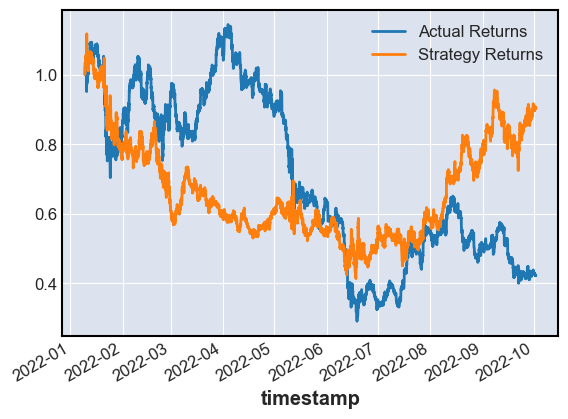

In [32]:
# Plot the actual returns versus the strategy returns

(1 + predictions_df[["Actual Returns", "Strategy Returns"]]).cumprod().plot()

In [35]:
# Import LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

In [36]:
# Create an instance of the LogisticRegression model
logistic_regression_model = LogisticRegression()

In [37]:
# Fit the LogisticRegression model

logistic_regression_model = logistic_regression_model.fit(X_train_scaled, y_train)
logistic_regression_model

LogisticRegression()

In [41]:
# Use the trained LogisticRegression model to predict the trading signals for the training data
lr_training_signal_predictions = logistic_regression_model.predict(X_train_scaled)

# Display the predictions

lr_training_signal_predictions[:10]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [43]:
# Generate a classification report using the training data and the logistic regression model's predications
lr_training_report = classification_report(y_train, predictions_df)

# Review the classification report
print(lr_training_report)

ValueError: Found input variables with inconsistent numbers of samples: [2172, 6352]